In [2]:
from tensorflow.keras.datasets.mnist import load_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train , y_train),(x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [4]:
print(f'{x_train.shape=}')

x_train.shape=(60000, 28, 28)


In [35]:
xnorm = ((x_train - 128.0)/128.0).reshape([-1,784]).reshape([-1,28*28])
xnorm[3]

array([-1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.       ,
       -1.       , -1.       , -1.       , -1.       , -1.    

!Create masked images


In [36]:
def gen_masked(img , prob , seed = None):
    if(seed): np.random.seed(seed)
    mask = np.random.binomial(n = 1 , p = prob , size = img.shape)
    return mask * img

gen_masked(xnorm , 0.5 , 9919).shape


(60000, 784)

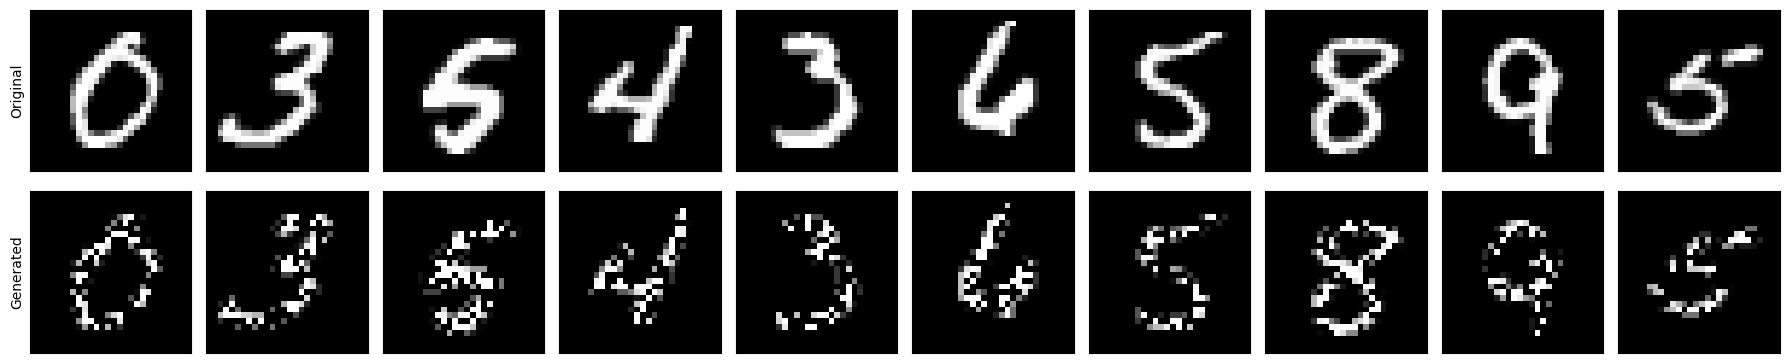

In [98]:
def plotim(imgs, gimages):
    n = imgs.shape[0]
    fig , ax = plt.subplots(2, n, figsize = (18,4), sharex= True, sharey= True)
    for i in range(imgs.shape[0]):
        ax[0,i].imshow(imgs[i], cmap = 'gray')
        ax[1,i].imshow(gimages[i], cmap = 'gray')
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        if(i == 0):
            ax[0,i].set_ylabel('Original')
            ax[1,i].set_ylabel('Generated')
    plt.tight_layout()

rand = np.random.randint(0,28*28)
imgs = x_train[rand : rand+10]
gimages = gen_masked(imgs , 0.5)
labels = y_train[rand: rand+10]
plotim(imgs, gimages)

In [38]:
xnorm.shape

(60000, 784)

#define the model


In [39]:
from tensorflow.keras import layers , models

autoencoder = models.Sequential([
    layers.Dense(64 , activation = 'relu' , input_shape = (784,)), 
    layers.Dense(32 , activation = 'relu') , 
    layers.Dense(64 , activation = 'relu') , 
    layers.Dense(784 , activation = 'tanh')
])

autoencoder.compile(loss = 'mse' , optimizer = 'adam')
autoencoder.summary()

/Users/sanketmishra/Desktop/Desktop/college/PhD/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 945us/step - loss: 0.2323
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - loss: 0.1082
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step - loss: 0.0965
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0910
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - loss: 0.0877
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 957us/step - loss: 0.0839
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - loss: 0.0813
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step - loss: 0.0797
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step - loss: 0.0780
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - loss: 0.0763
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step - loss: 0.0750
Epoch 12/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - loss: 0.0741
Epoch 13/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - loss: 0.0738
Epoch 14/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - loss: 0.0733
Epoch 15/20
938/938 ━━━━━━━━━━━

Text(0.5, 1.0, 'Autoencoder reconstruction loss for MNIST dataset')

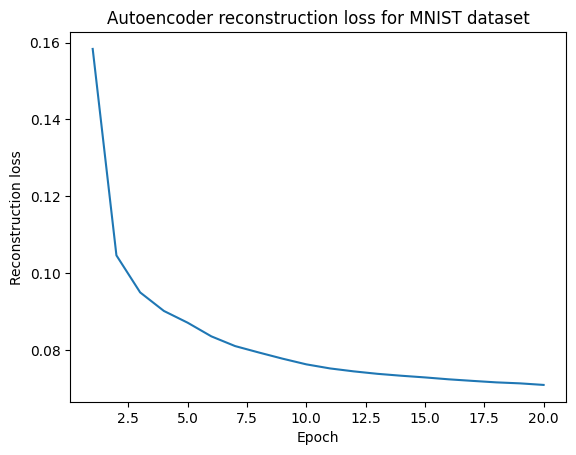

In [40]:
history = autoencoder.fit(gen_masked(xnorm , 0.5) , xnorm , batch_size=64 , epochs = 20)
# Plotting the loss
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Reconstruction loss")
plt.title("Autoencoder reconstruction loss for MNIST dataset")

#prediction


In [100]:
x_train_sample = x_train[rand:rand+10]
masked_x_train_sample = gen_masked(x_train_sample, 0.5, seed=2048)
norm_masked_x = ((masked_x_train_sample - 128.0)/128.0).reshape(-1, 784)

# Predicting the restored images from corrupted images
y_pred = autoencoder.predict(norm_masked_x) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [101]:
print(y_pred)
print('y_pred has shape: {}'.format(y_pred.shape))

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]
y_pred has shape: (10, 784)


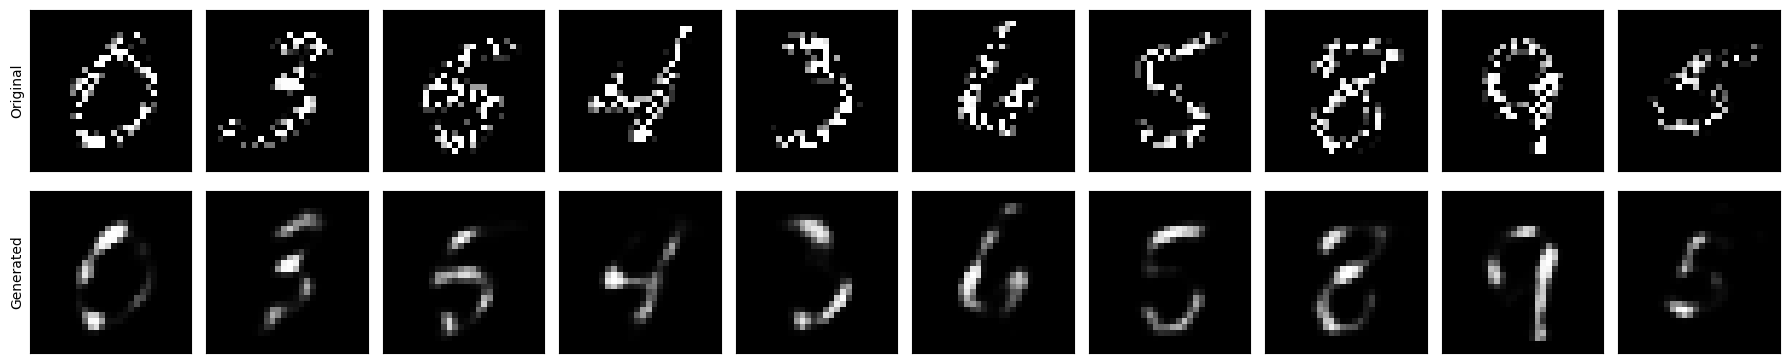

In [102]:
res_img = ((y_pred.reshape(-1)*128)+128).reshape(-1, 28,28)
plotim(masked_x_train_sample , res_img)

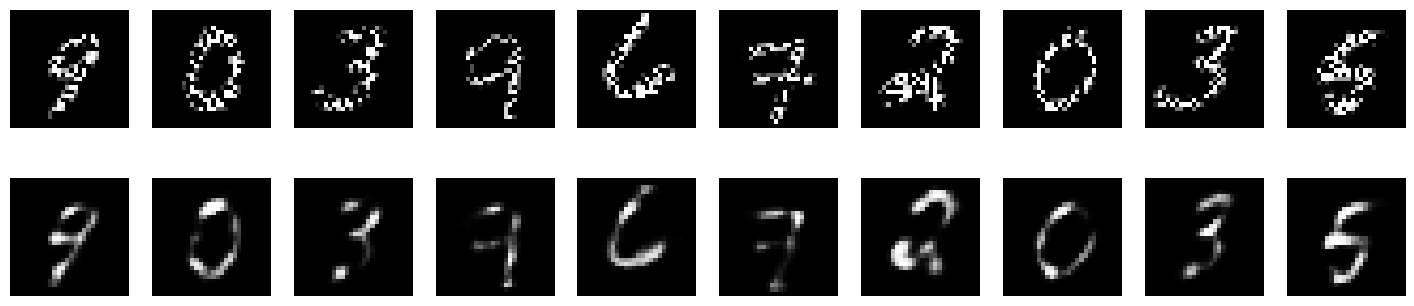

In [55]:
# Plotting the corrupted and restored images side-by-side
f, axes = plt.subplots(2, 10, figsize=(18,4))

for i, (img, res) in enumerate(zip(masked_x_train_sample, y_pred)):
    r1, c1 = 0, i
    r2, c2 = 1, i
    axes[r1,c1].imshow(img,cmap='gray')
    axes[r1,c1].axis('off')
    
    res = ((res * 128.0)+128.0).reshape(28,28)
    axes[r2,c2].imshow(res,cmap='gray')
    axes[r2,c2].axis('off')